<a href="https://colab.research.google.com/github/mmedhat2/Projects/blob/main/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gathering Data**

In [80]:
import pandas as pd 
import numpy as np
import tweepy
import requests
import json
import csv
import matplotlib.pyplot as plt
import seaborn as sns



archivedf = pd.read_csv('twitter-archive.csv')


In [81]:
archivedf

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [82]:
imgdf = pd.DataFrame(columns=['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf',
                              'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'])
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

response = requests.get(url)
response.raise_for_status()  




with open("image-predictions.tsv", "wb") as file:
    file.write(response.content)
    
    
with open("image-predictions.tsv", "r", encoding="utf-8") as file:
    reader = csv.reader(file, delimiter="\t")

    for row in reader:
      imgdf.loc[len(imgdf)] = row
        

imgdf = imgdf.tail(-1)

#saving file as it needs to be connected to internet everytime of loading



#imgdf.to_csv('imgdf.csv')
imgdf = pd.read_csv('imgdf.csv')

In [83]:
import json
text_file_path = 'tweets.txt'
data = []
with open(text_file_path, 'r') as file:
    for line in file:
        line = line.strip()
        if line:
            data.append(json.loads(line))
            
tweetsdf = pd.DataFrame(data)


In [84]:
tweetsdf

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,False,False,en,NaN,NaN,NaN,NaN
2350,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,False,False,en,NaN,NaN,NaN,NaN
2351,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,False,False,en,NaN,NaN,NaN,NaN
2352,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,False,False,en,NaN,NaN,NaN,NaN


# **Assesing Data**

## Tidiness issues

Issue (1): Wrong Data Types

In [85]:
#Data Types


print(archivedf.info())
print(imgdf.info())
print(tweetsdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Issue (2) : Columns have mutiple values that can't be used

In [86]:
tweetsdf.entities

0       {'hashtags': [], 'symbols': [], 'user_mentions...
1       {'hashtags': [], 'symbols': [], 'user_mentions...
2       {'hashtags': [], 'symbols': [], 'user_mentions...
3       {'hashtags': [], 'symbols': [], 'user_mentions...
4       {'hashtags': [{'text': 'BarkWeek', 'indices': ...
                              ...                        
2349    {'hashtags': [], 'symbols': [], 'user_mentions...
2350    {'hashtags': [], 'symbols': [], 'user_mentions...
2351    {'hashtags': [], 'symbols': [], 'user_mentions...
2352    {'hashtags': [], 'symbols': [], 'user_mentions...
2353    {'hashtags': [], 'symbols': [], 'user_mentions...
Name: entities, Length: 2354, dtype: object

Issue (3) : unnecessary columns  that can be joined

In [87]:
archivedf.iloc[:,-4:]

,doggo,floofer,pupper,puppo
0,None,None,None,None
1,None,None,None,None
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None
...,...,...,...,...
2351,None,None,None,None
2352,None,None,None,None
2353,None,None,None,None
2354,None,None,None,None


## Quality issues

Issue ( 1 ): Missing Values in Archive Dataset


Issue ( 2 ): Missing Values in Tweets Dataset

In [88]:
## nan values in data sets


def nullperc(x):
    datasets = x
    for df in datasets:
        x = df.isna().sum()
        x = pd.DataFrame(x).reset_index()
        x = x.rename(columns={'index':'column',0:'No. of Rows'})
        plist = []
        for i in range(len(x)):
            prs = int((x.iloc[i,1]/len(df))*100)
            plist.append(prs)
        x['null_percentage'] = plist
        
        
        fig = plt.figure(figsize=(12, 5))
        ax = plt.bar(x['column'],x['null_percentage'])
        ticks = plt.xticks(rotation = 45,ha='right')
        title = fig.suptitle("% Null")
        ylabel = plt.yticks(range(0,110,10))

        plt.show()

#nullperc([archivedf,imgdf,tweetsdf])

Issue ( 3 ): Wrong Dog Names

In [89]:
imgdf.loc[[7,9,19],'p1']

7                  chow
9      miniature_poodle
19    Italian_greyhound
Name: p1, dtype: object

Issue ( 4 ): Wrong Image Predictions

In [119]:
#tweets with 2 or more Wrong photos
imgdf[((imgdf['p1_dog'] == False) &(imgdf['p2_dog'] == False)) |
          ((imgdf['p1_dog'] == False) & (imgdf['p3_dog'] == False))|
          ((imgdf['p2_dog'] == False) & (imgdf['p3_dog'] == False))]

,Unnamed: 0,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,7,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
8,9,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,18,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,19,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,22,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044,2045,886258384151887873,https://pbs.twimg.com/media/DEyfTG4UMAE4aE9.jpg,1,pug,0.943575,True,shower_cap,0.025286,False,Siamese_cat,0.002849,False
2046,2047,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,2053,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
2071,2072,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


Issue ( 5 ): Irregular Numbers in Counts

In [91]:
tweetsdf.loc[[211,158],['retweet_count','favorite_count']]

,retweet_count,favorite_count
211,23,0
158,2334,0


Issue ( 6 ): Wrong boolean values

In [92]:
boolenvals = imgdf.copy()
boolenvals.loc[2066:2071,['p1_dog','p2_dog','p3_dog']]

,p1_dog,p2_dog,p3_dog
2066,True,True,True
2067,True,True,True
2068,True,True,False
2069,True,True,False
2070,True,True,True
2071,False,True,False


In [93]:
boolenvals['p1_dog'] =boolenvals['p1_dog'].astype(bool)
boolenvals['p2_dog'] = boolenvals['p1_dog'].astype(bool)
boolenvals['p3_dog'] = boolenvals['p1_dog'].astype(bool)
boolenvals.loc[2066:2071,['p1_dog','p2_dog','p3_dog']]

,p1_dog,p2_dog,p3_dog
2066,True,True,True
2067,True,True,True
2068,True,True,True
2069,True,True,True
2070,True,True,True
2071,False,False,False


Issue ( 7 ): wrong languages abbreviations

In [94]:
tweetsdf['lang'].unique()

array(['en', 'und', 'in', 'eu', 'es', 'nl', 'tl', 'ro', 'et'],
      dtype=object)

Issue ( 8 ): missing values in entities column

In [95]:
tweetsdf.entities

0       {'hashtags': [], 'symbols': [], 'user_mentions...
1       {'hashtags': [], 'symbols': [], 'user_mentions...
2       {'hashtags': [], 'symbols': [], 'user_mentions...
3       {'hashtags': [], 'symbols': [], 'user_mentions...
4       {'hashtags': [{'text': 'BarkWeek', 'indices': ...
                              ...                        
2349    {'hashtags': [], 'symbols': [], 'user_mentions...
2350    {'hashtags': [], 'symbols': [], 'user_mentions...
2351    {'hashtags': [], 'symbols': [], 'user_mentions...
2352    {'hashtags': [], 'symbols': [], 'user_mentions...
2353    {'hashtags': [], 'symbols': [], 'user_mentions...
Name: entities, Length: 2354, dtype: object

## Data Cleaning

Issue ( 1 ) : Wrong Data Types

In [96]:
imgdf_cleaned = imgdf.copy()
tweetsdf_cleaned = tweetsdf.copy()
archivedf_cleaned = archivedf.copy()

archivedf_cleaned = archivedf_cleaned.sort_values(by='tweet_id',ascending=True)
archivedf_cleaned['tweet_id'] = archivedf_cleaned['tweet_id'].astype(object)


imgdf_cleaned['p1_conf'] = imgdf_cleaned['p1_conf'].astype(float)
imgdf_cleaned['p2_conf'] = imgdf_cleaned['p2_conf'].astype(float)
imgdf_cleaned['p3_conf'] = imgdf_cleaned['p3_conf'].astype(float)

tweetsdf_cleaned = tweetsdf_cleaned.sort_values(by='id',ascending=True)
tweetsdf_cleaned['id'] = tweetsdf_cleaned['id'].astype(object)



tweetsdf_cleaned =tweetsdf_cleaned.copy()
tweetsdf_cleaned.loc[:,'created_at'] = pd.to_datetime(tweetsdf_cleaned.loc[:,'created_at'])
archivedf_cleaned =archivedf_cleaned.copy()
archivedf_cleaned.loc[:,'timestamp'] = pd.to_datetime(archivedf_cleaned.loc[:,'timestamp'])

Issue ( 3 ) : unnecessary columns  that can be joined

In [97]:
def join_columns(column1, column2, column3, column4):
    joined_column = []
    
    for val1, val2, val3, val4 in zip(column1, column2, column3, column4):
        if val1 is not None:
            joined_column.append(val1)
        elif val2 is not None:
            joined_column.append(val2)
        elif val3 is not None:
            joined_column.append(val3)
        else:
            joined_column.append(val4)
    
    return joined_column

# Example usage:
column1 = archivedf_cleaned['doggo']
column2 = archivedf_cleaned['floofer']
column3 = archivedf_cleaned['pupper']
column4 = archivedf_cleaned['puppo']

joined_column = join_columns(column1, column2, column3, column4)
archivedf_cleaned['Nickname'] = joined_column
archivedf_cleaned.drop(columns=['doggo','floofer','pupper','puppo'],inplace=True)

Issue (2) : Columns have mutiple values that can't be used

In [98]:
def hashtags(col):
    hashtags = []
    for i in col:
        entities = dict(i)
        if entities['hashtags'] == []:
            hashtags.append('None')
        else:
            hashtags.append(entities['hashtags'][0]['text'])
            
    return hashtags

tweetsdf_cleaned['hashtags'] = hashtags(tweetsdf_cleaned['entities'])


Issue ( 1 ) , ( 2 ) : Null Values in multiple datasets

In [99]:
# dropping columns with more than 90% nan values
datasets = [archivedf_cleaned,imgdf_cleaned,tweetsdf_cleaned]
def dropnans(data):
    x= data.dropna(thresh=data.shape[0]*0.9,how='all',axis=1)
    return x
archivedf_cleaned = dropnans(datasets[0])
imgdf_cleaned = dropnans(datasets[1])
tweetsdf_cleaned = dropnans(datasets[2])

In [100]:
#nullperc([archivedf_cleaned,imgdf_cleaned,tweetsdf_cleaned])

Issue ( 3 ): Wrong Dog Names

In [101]:
imgdf_cleaned['p1'].mask(imgdf_cleaned['p1_dog'] == 'False' ,None, inplace=True)
imgdf_cleaned['p2'].mask(imgdf_cleaned['p2_dog'] == 'False' ,None, inplace=True)
imgdf_cleaned['p3'].mask(imgdf_cleaned['p3_dog'] == 'False' ,None, inplace=True)


Issue ( 4 ): Wrong Image Predictions

In [102]:
#dropping tweets with 2 or more Wrong photos and Dog Names
imgdf_cleaned.drop(imgdf_cleaned[((imgdf_cleaned['p1_dog'] == 'False') &(imgdf_cleaned['p2_dog'] == 'False')) |
          ((imgdf_cleaned['p1_dog'] == 'False') & (imgdf_cleaned['p3_dog'] == 'False'))|
          ((imgdf_cleaned['p2_dog'] == 'False') & (imgdf_cleaned['p3_dog'] == 'False'))].index,axis=0,inplace=True)

Issue ( 5 ): Irregular Numbers in favorite_count

Issue ( 7 ): wrong languages abbreviations

We Won't Remove Them As They Won't Affect Our Analysis

Issue ( 8 ): missing values in entities column

In [103]:
#dropping entities column and other unnecessary columns

tweetsdf_cleaned = tweetsdf_cleaned.drop(columns=['entities','id_str','display_text_range',
                                                  'truncated','is_quote_status'],axis=1)

Dropping tweets before 2017


In [104]:
tweetsdf_cleaned = tweetsdf_cleaned[tweetsdf_cleaned['created_at'] < '2017-8-02']

Renaming Columns And Merging

In [126]:
tweetsdf_cleaned.rename(columns={'id':'tweet_id'},inplace=True)
imgdf_cleaned = imgdf_cleaned.drop(columns='tweet_id')
newdf = archivedf_cleaned.merge(tweetsdf_cleaned,on='tweet_id')
newdf2 = pd.concat([newdf,imgdf_cleaned.iloc[:,1:]],axis=1)

Dropping Unnecessary Columns

In [127]:
newdf2 = newdf2[['tweet_id','source_x','rating_numerator','rating_denominator','name','Nickname','retweet_count'
                 ,'favorite_count','p1','p2','p3','created_at','hashtags']]

Dropping rows With No Img Data

In [128]:
newdf2.dropna()

,tweet_id,source_x,rating_numerator,rating_denominator,name,Nickname,retweet_count,favorite_count,p1,p2,p3,created_at,hashtags
0,666020888022790149,"<a href=""http://twitter.com/download/iphone"" r...",8,10,None,None,532,2535,Welsh_springer_spaniel,collie,Shetland_sheepdog,2015-11-15 22:32:08+00:00,None
1,666029285002620928,"<a href=""http://twitter.com/download/iphone"" r...",7,10,a,None,48,132,redbone,miniature_pinscher,Rhodesian_ridgeback,2015-11-15 23:05:30+00:00,None
2,666033412701032449,"<a href=""http://twitter.com/download/iphone"" r...",9,10,a,None,47,128,German_shepherd,malinois,bloodhound,2015-11-15 23:21:54+00:00,None
3,666044226329800704,"<a href=""http://twitter.com/download/iphone"" r...",6,10,a,None,147,311,Rhodesian_ridgeback,redbone,miniature_pinscher,2015-11-16 00:04:52+00:00,None
4,666049248165822465,"<a href=""http://twitter.com/download/iphone"" r...",5,10,None,None,41,111,miniature_pinscher,Rottweiler,Doberman,2015-11-16 00:24:50+00:00,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,838921590096166913,"<a href=""http://twitter.com/download/iphone"" r...",13,10,Arlo,None,2357,12183,basset,English_springer,German_short-haired_pointer,2017-03-07 01:17:48+00:00,None
2071,838952994649550848,"<a href=""http://twitter.com/download/iphone"" r...",13,10,None,None,4505,21289,paper_towel,Labrador_retriever,spatula,2017-03-07 03:22:35+00:00,None
2072,839239871831150596,"<a href=""http://twitter.com/download/iphone"" r...",13,10,Odie,None,7422,29684,Chihuahua,malamute,kelpie,2017-03-07 22:22:32+00:00,None
2073,839290600511926273,"<a href=""http://twitter.com/download/iphone"" r...",10,10,None,None,158,0,Chihuahua,Pekinese,papillon,2017-03-08 01:44:07+00:00,None


# **Analyzing and Visualizing Data**

infos about most viral dogs and ones that poeple like the most

In [108]:

#count for favourite for each dog
Dogsfav1 = pd.DataFrame(newdf2.groupby('p1')['favorite_count'].sum()).reset_index().rename(columns={'p1':'name'})
Dogsfav2 = pd.DataFrame(newdf2.groupby('p2')['favorite_count'].sum()).reset_index().rename(columns={'p2':'name'})
Dogsfav3 = pd.DataFrame(newdf2.groupby('p3')['favorite_count'].sum()).reset_index().rename(columns={'p3':'name'})

Dogsfavs = pd.merge(Dogsfav1,Dogsfav2,on='name')
Dogsfavourites = pd.merge(Dogsfavs,Dogsfav3,on='name')
Dogsfavourites['favorites_count'] = Dogsfavourites[['favorite_count_x','favorite_count_y','favorite_count']].sum(1)
Dogsfavourites.sort_values(by='favorites_count',ascending=False)


#count of retweets for each dog
Dogsretweet1 = pd.DataFrame(newdf2.groupby('p1')['retweet_count'].sum()).reset_index().rename(columns={'p1':'name'})
Dogsretweet2 = pd.DataFrame(newdf2.groupby('p2')['retweet_count'].sum()).reset_index().rename(columns={'p2':'name'})
Dogsretweet3 = pd.DataFrame(newdf2.groupby('p3')['retweet_count'].sum()).reset_index().rename(columns={'p3':'name'})

DogsRetweets1 = pd.merge(Dogsretweet1,Dogsretweet2,on='name')
DogsRetweetsfinal = pd.merge(DogsRetweets1,Dogsretweet2,on='name')
DogsRetweetsfinal['retweets_count'] = DogsRetweetsfinal[['retweet_count_x','retweet_count_y','retweet_count']].sum(1)


#merging the two dataframes

DogsInfos = pd.merge(DogsRetweetsfinal,Dogsfavourites,on='name')
DogsInfos.drop(columns=['retweet_count_x','retweet_count_y','retweet_count'
                               ,'favorite_count_x','favorite_count_y','favorite_count'],inplace=True)
DogsInfos = DogsInfos.sort_values(by=['retweets_count','favorites_count'],ascending=[False,False])

DogsInfos

,name,retweets_count,favorites_count
115,golden_retriever,1232735,2177731
37,Labrador_retriever,856405,2166191
49,Pembroke,595030,1209184
16,Cardigan,493488,749723
50,Pomeranian,416693,774927
...,...,...,...
86,bow,1687,20257
173,standard_schnauzer,1615,10265
144,otter,1435,12826
167,snail,1271,2966


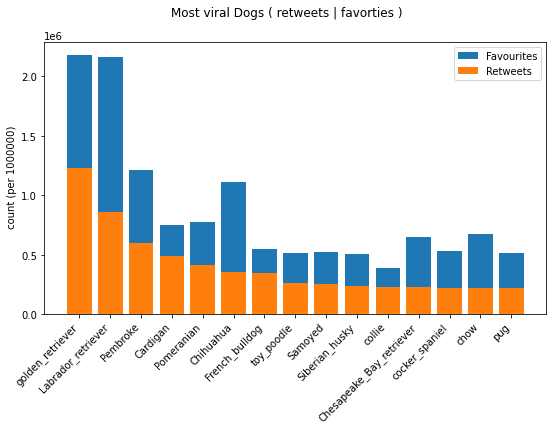

In [109]:
x=DogsInfos.iloc[:15,:]

fig = plt.figure(figsize=(9, 5))
ax1 = plt.bar(x['name'],x['favorites_count'],label='Favourites')
ax2 = plt.bar(x['name'],x['retweets_count'],label='Retweets')
plt.legend()
ticks = plt.xticks(rotation = 45,ha='right')
title = fig.suptitle("Most viral Dogs ( retweets | favorties )")
ylabel=plt.ylabel(' count (per 1000000)')


does hashtags affect tweets popularity?

In [110]:
nohashtagtwt = newdf2[newdf2['hashtags'] == 'None']
nohashtagtwt=nohashtagtwt.loc[:,['retweet_count','favorite_count','hashtags']]
nohashtagtwt['popularity'] = nohashtagtwt[['retweet_count','favorite_count']].sum(1)

We Can See That Tweets Without Hashtags has more Data Points and alot of outliers

<AxesSubplot:xlabel='popularity'>

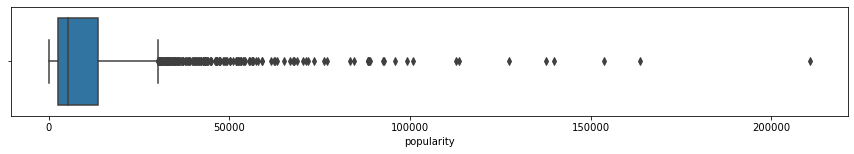

In [111]:
plt.figure(figsize=(15, 2))
sns.boxplot(x=nohashtagtwt['popularity'])


while Tweets with Hashtags has way less Data Points And outliers affect the mean alot

In [112]:
hashtagtwt = newdf2[newdf2['hashtags'] != 'None']
hashtagtwt=hashtagtwt.loc[:,['retweet_count','favorite_count','hashtags']]
hashtagtwt['popularity'] = hashtagtwt[['retweet_count','favorite_count']].sum(1)

<AxesSubplot:xlabel='popularity'>

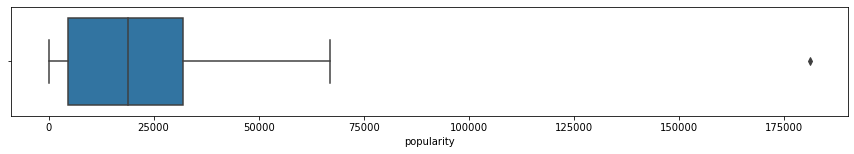

In [113]:

plt.figure(figsize=(15, 2))
sns.boxplot(x=hashtagtwt['popularity'])


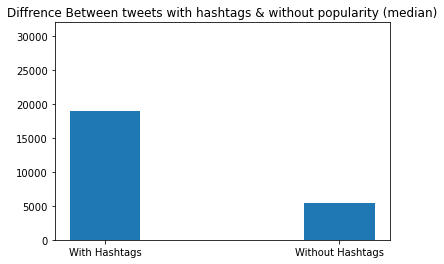

In [114]:
labels= ['With Hashtags','Without Hashtags']
heights = [hashtagtwt['popularity'].median(),nohashtagtwt['popularity'].median()]
plt.bar(labels,heights,width=0.3)
plt.ylim(0,32000)
plt.title('Diffrence Between tweets with hashtags & without popularity (median)')
plt.show()

tweets with highest ratings

In [129]:
tweetraterank = newdf2.sort_values(by='rating_numerator',ascending=False)
tweetraterank.iloc[:10,[0,1,2,3,4,5,6,7,8,9,10,11,12]]

,tweet_id,source_x,rating_numerator,rating_denominator,name,Nickname,retweet_count,favorite_count,p1,p2,p3,created_at,hashtags
1376,749981277374128128,"<a href=""https://about.twitter.com/products/tw...",1776,10,Atticus,None,2772,5569,miniature_poodle,toy_poodle,teddy,2016-07-04 15:00:45+00:00,None
2041,835246439529840640,"<a href=""http://twitter.com/download/iphone"" r...",960,0,None,None,83,2259,Labrador_retriever,seat_belt,pug,2017-02-24 21:54:03+00:00,None
2165,855860136149123072,"<a href=""http://twitter.com/download/iphone"" r...",666,10,None,None,1058,4407,NaN,NaN,NaN,2017-04-22 19:05:32+00:00,None
2166,855862651834028034,"<a href=""http://twitter.com/download/iphone"" r...",420,10,None,None,27,320,NaN,NaN,NaN,2017-04-22 19:15:32+00:00,None
281,670842764863651840,"<a href=""http://twitter.com/download/iphone"" r...",420,10,None,None,4324,7989,goose,Chihuahua,hen,2015-11-29 05:52:33+00:00,None
1235,731156023742988288,"<a href=""http://twitter.com/download/iphone"" r...",204,170,this,None,1434,4196,toy_poodle,Lakeland_terrier,affenpinscher,2016-05-13 16:15:54+00:00,None
2064,838150277551247360,"<a href=""http://twitter.com/download/iphone"" r...",182,10,None,None,370,1824,Samoyed,Pomeranian,chow,2017-03-04 22:12:52+00:00,None
1453,758467244762497024,"<a href=""http://twitter.com/download/iphone"" r...",165,150,None,None,2539,5316,Chihuahua,dalmatian,toy_terrier,2016-07-28 01:00:57+00:00,None
576,677716515794329600,"<a href=""http://twitter.com/download/iphone"" r...",144,120,None,None,1104,3323,maze,streetcar,sundial,2015-12-18 05:06:23+00:00,None
721,684225744407494656,"<a href=""http://twitter.com/download/iphone"" r...",143,130,None,None,239,1369,Siberian_husky,Eskimo_dog,malamute,2016-01-05 04:11:44+00:00,None


We Can See there's some wrong numbers in rating denominator as it shouldn't be 0  